<a href="https://colab.research.google.com/github/apadkavyrava/Diversity-rating/blob/master/Diversity_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download and combine data. Preparing dataset for analysis

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Read data 

enq_data = pd.read_csv('Raw_data/equality_data.csv')
codebook = pd.read_csv('Raw_data/equality_codebook.csv')


In [3]:
#Data overview

enq_data.head(2)


,Unnamed: 0,E001,E002,E003,E004,E005,E006,E007,E024,E008,...,E016,E017,E018,E019,E020,E025,E026,E021,E022,E023
0,1,NaN,24.0,21.0,NaN,NaN,41.0,8.0,78.0,0.273,...,NaN,NaN,NaN,NaN,NaN,49.0,1.0,0.0,0.0,0.0
1,2,NaN,35.8,52.0,NaN,NaN,28.0,0.0,-95.9,0.250,...,NaN,NaN,NaN,NaN,NaN,28.0,0.0,0.0,0.0,0.0


In [4]:
codebook.head(2)

,Pillar,Indicator Name,Programmatic Name,Code,Description,Unit,Source
0,Equality,Most recent graduate intake who are female (%),equality_female_graduates,E001,The percentage of recent graduates hired by th...,Percentage,"Annual Report, Pay Gap Report"
1,Equality,Senior manageers who are female (%),equality_female_management,E002,The percentage of senior management active at ...,Percentage,"Annual Report, Pay Gap Report"


##### Explore Units of  Programmatic Name to understand how to quantify the programs

In [5]:
# Units available

codebook.Unit.unique()


array(['Percentage', 'Weeks', '1/0', '4/3/2/1/0'], dtype=object)

In [6]:
# Meaning '1/0', '4/3/2/1/0' aren't clean; read a full describtion

pd.set_option('display.max_colwidth', None)
codebook.loc[codebook['Unit'] == '1/0', 'Description']


9                  A binary variable indicating whether a company is a member of the WISE Campaign (Women in Science and Engineering)
20                          A binary indicator showing whether or not BAME Pay Gap Reporting is being undertaken by the company/group
21                         A binary indicator showing whether or not LGBT+ Pay Gap Reporting is being undertaken by the company/group
22                    A binary indicator showing whether or not Disability Pay Gap Reporting is being undertaken by the company/group
25    A binary variable indicating whether a company has met the Parker Review target of at least one non-white board-level director.
Name: Description, dtype: object

In [7]:
# Same for '4/3/2/1/0'; read a full describtion

pd.set_option('display.max_colwidth', None)
codebook.loc[codebook['Unit'] == '4/3/2/1/0', 'Description']


10    A variable indicating the level of a company's membership of the WISE (Women in Science and Engineering) Campaign. 1 indicates the company is an Online Member, 2 indicates Core Member, 3 indicates Premium Member and 4 indicates Strategic Partner.
Name: Description, dtype: object

#### Add units to the programmatic name and fill out the codes of program with their full names

In [8]:
# Change values to consile readable symbols

codebook['Unit'] = codebook['Unit'].replace({
    'Percentage': '(%)',
    'Weeks': '(W)',
    '1/0': "(Y/N)",
    '4/3/2/1/0': ",Level(4-0)"
})

# Add to programs their units
codebook['Program,unit'] = codebook['Programmatic Name'] + " " + codebook['Unit']

# Change columns' names in the enq_data dataset with actual names from the codebook dataset
buf_col = {}

for index, row in codebook.iterrows():
  key = row['Code']
  value = row['Program,unit']
  buf_col[key] = value

data = enq_data.rename(mapper = buf_col, axis =1)

data.head(3)


,Unnamed: 0,equality_female_graduates (%),equality_female_management (%),equality_female_employees (%),equality_leave_primary (W),equality_leave_secondary (W),equality_gender_pay (%),equality_gender_pay_improvement (%),equality_gender_bonus (%),equality_gender_directors (%),...,equality_lgbt_pay (%),equality_lgbt_management (%),equality_disability_employees (%),equality_disability_pay (%),equality_disability_management (%),equality_gender_pay_previous (%),equality_parker (Y/N),equality_bame_reporting (Y/N),equality_lgbt_reporting (Y/N),equality_disability_reporting (Y/N)
0,1,NaN,24.0,21.0,NaN,NaN,41.0,8.0,78.0,0.273,...,NaN,NaN,NaN,NaN,NaN,49.0,1.0,0.0,0.0,0.0
1,2,NaN,35.8,52.0,NaN,NaN,28.0,0.0,-95.9,0.250,...,NaN,NaN,NaN,NaN,NaN,28.0,0.0,0.0,0.0,0.0
2,3,NaN,29.0,51.0,16.0,2.0,3.6,0.3,24.9,0.300,...,NaN,NaN,2.83,NaN,NaN,3.9,0.0,0.0,0.0,0.0


### Dataset overview

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           99 non-null     int64  
 1   equality_female_graduates (%)        30 non-null     float64
 2   equality_female_management (%)       91 non-null     float64
 3   equality_female_employees (%)        98 non-null     float64
 4   equality_leave_primary (W)           50 non-null     float64
 5   equality_leave_secondary (W)         41 non-null     float64
 6   equality_gender_pay (%)              87 non-null     float64
 7   equality_gender_pay_improvement (%)  86 non-null     float64
 8   equality_gender_bonus (%)            85 non-null     float64
 9   equality_gender_directors (%)        99 non-null     float64
 10  equality_gender_appointments (%)     99 non-null     float64
 11  equality_wise (Y/N)               

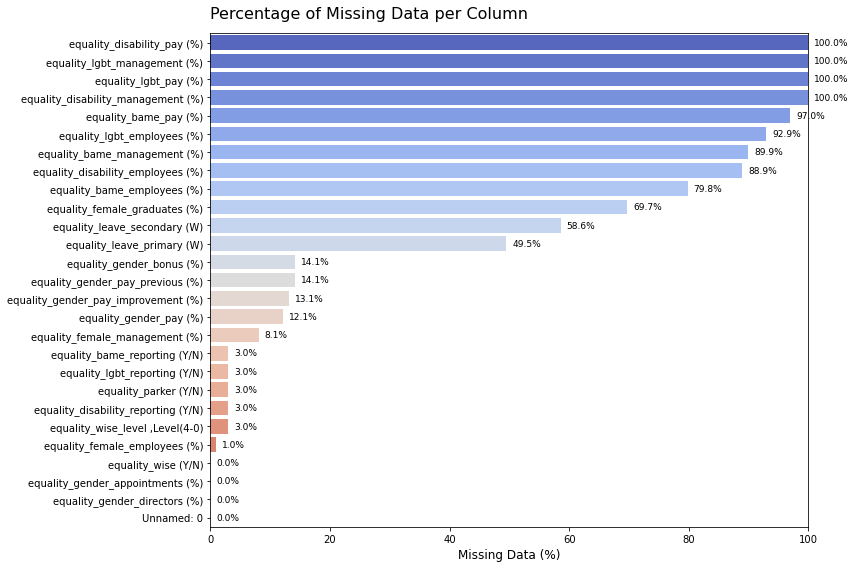

In [11]:
#  Missing data visualisation

# Calculate % missing per column
missing_percent = data.isna().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='coolwarm')

# Style
plt.title('Percentage of Missing Data per Column', fontsize=16, loc='left', pad=15)
plt.xlabel('Missing Data (%)', fontsize=12)
plt.ylabel('')
plt.xlim(0, 100)

# Add % labels at the end of each bar
for i, v in enumerate(missing_percent.values):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [12]:
data.to_csv('Project_csv/data.csv')